In [2]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os, sys
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
load_dotenv()

SAMPLE_SUBMISSION_ROWS = os.environ.get("SAMPLE_SUBMISSION_ROWS")
TRAINING_DATA = os.environ.get("TRAINING_DATA")

In [4]:
# Obtain training data 

df = pd.read_csv(TRAINING_DATA)

df.head()

ind_recommended  activation  customer_digital_activity_04  \
0                0           0                           NaN   
1                0           0                           NaN   
2                0           0                           NaN   
3                0           0                           NaN   
4                1           0                           NaN   

   customer_spend_01  customer_industry_spend_01  customer_industry_spend_02  \
0         107.215862                   26.686594                        74.0   
1          35.552000                   50.928261                         3.0   
2          31.623103                   48.837872                        19.0   
3         112.277391                         NaN                         NaN   
4         448.427273                         NaN                         NaN   

   customer_industry_spend_03  customer_industry_spend_04  \
0                     3682.75                       138.0   
1                     1171.35                        23.0   
2                     2295.38                        47.0   
3                         NaN                         NaN   
4                         NaN                         NaN   

   customer_industry_spend_05  customer_spend_02  ...  merchant_spend_09  \
0                       111.0               14.0  ...            49466.0   
1                        17.0                2.0  ...             3638.0   
2                        42.0               11.0  ...             3912.0   
3                         NaN               16.0  ...            28919.0   
4                         NaN                5.0  ...             1086.0   

   merchant_profile_03  customer_digital_activity_01  merchant_spend_10  \
0              65923.0                      0.000000             29.180   
1               7801.0                      0.419355             28.465   
2              12868.0                      0.836364            421.500   
3              23553.0                      0.952381             50.000   
4                308.0                      0.754386             69.509   

   customer_profile_03  customer_digital_activity_02  customer_profile_04  \
0            58.434969                     32.500000                 86.0   
1             5.392089                      7.000000                125.0   
2            33.780445                      0.000000                180.0   
3            37.340085                     28.666667                134.0   
4            77.794164                     15.000000                114.0   

   distance_05  customer  merchant  
0    15.856826    168972    152285  
1     6.998555    212404     39032  
2     1.753009    225178      7439  
3     9.000063    183948    485069  
4     1.767939    210107    536004  

[5 rows x 71 columns]

In [5]:
df.shape[0]

12229978

In [6]:
# Compute the correlation matrix between features

correlation_matrix = df.corr()

correlation_matrix

ind_recommended  activation  \
ind_recommended                      1.000000    0.003215   
activation                           0.003215    1.000000   
customer_digital_activity_04         0.008588    0.025995   
customer_spend_01                    0.002103   -0.003050   
customer_industry_spend_01          -0.003528   -0.007459   
...                                       ...         ...   
customer_digital_activity_02         0.124680    0.016338   
customer_profile_04                  0.014989    0.005493   
distance_05                         -0.037411   -0.024814   
customer                            -0.009503   -0.003934   
merchant                             0.001897    0.000618   

                              customer_digital_activity_04  customer_spend_01  \
ind_recommended                                   0.008588           0.002103   
activation                                        0.025995          -0.003050   
customer_digital_activity_04                      1.000000          -0.003088   
customer_spend_01                                -0.003088           1.000000   
customer_industry_spend_01                       -0.011475           0.219168   
...                                                    ...                ...   
customer_digital_activity_02                      0.005630           0.010449   
customer_profile_04                              -0.013428           0.011822   
distance_05                                      -0.021298           0.005673   
customer                                          0.007011          -0.005831   
merchant                                          0.005580          -0.000383   

                              customer_industry_spend_01  \
ind_recommended                                -0.003528   
activation                                     -0.007459   
customer_digital_activity_04                   -0.011475   
customer_spend_01                               0.219168   
customer_industry_spend_01                      1.000000   
...                                                  ...   
customer_digital_activity_02                    0.008797   
customer_profile_04                             0.049894   
distance_05                                     0.027960   
customer                                       -0.029324   
merchant                                       -0.000569   

                              customer_industry_spend_02  \
ind_recommended                                 0.042722   
activation                                      0.094103   
customer_digital_activity_04                    0.017589   
customer_spend_01                              -0.022321   
customer_industry_spend_01                     -0.050042   
...                                                  ...   
customer_digital_activity_02                    0.080278   
customer_profile_04                            -0.078459   
distance_05                                    -0.073940   
customer                                        0.047854   
merchant                                        0.001225   

                              customer_industry_spend_03  \
ind_recommended                                 0.001908   
activation                                      0.007667   
customer_digital_activity_04                    0.001346   
customer_spend_01                               0.144131   
customer_industry_spend_01                      0.370825   
...                                                  ...   
customer_digital_activity_02                    0.026526   
customer_profile_04                             0.013770   
distance_05                                    -0.005588   
customer                                       -0.006488   
merchant                                       -0.000766   

                              customer_industry_spend_04  \
ind_recommended                                 0.036030   
activation                               

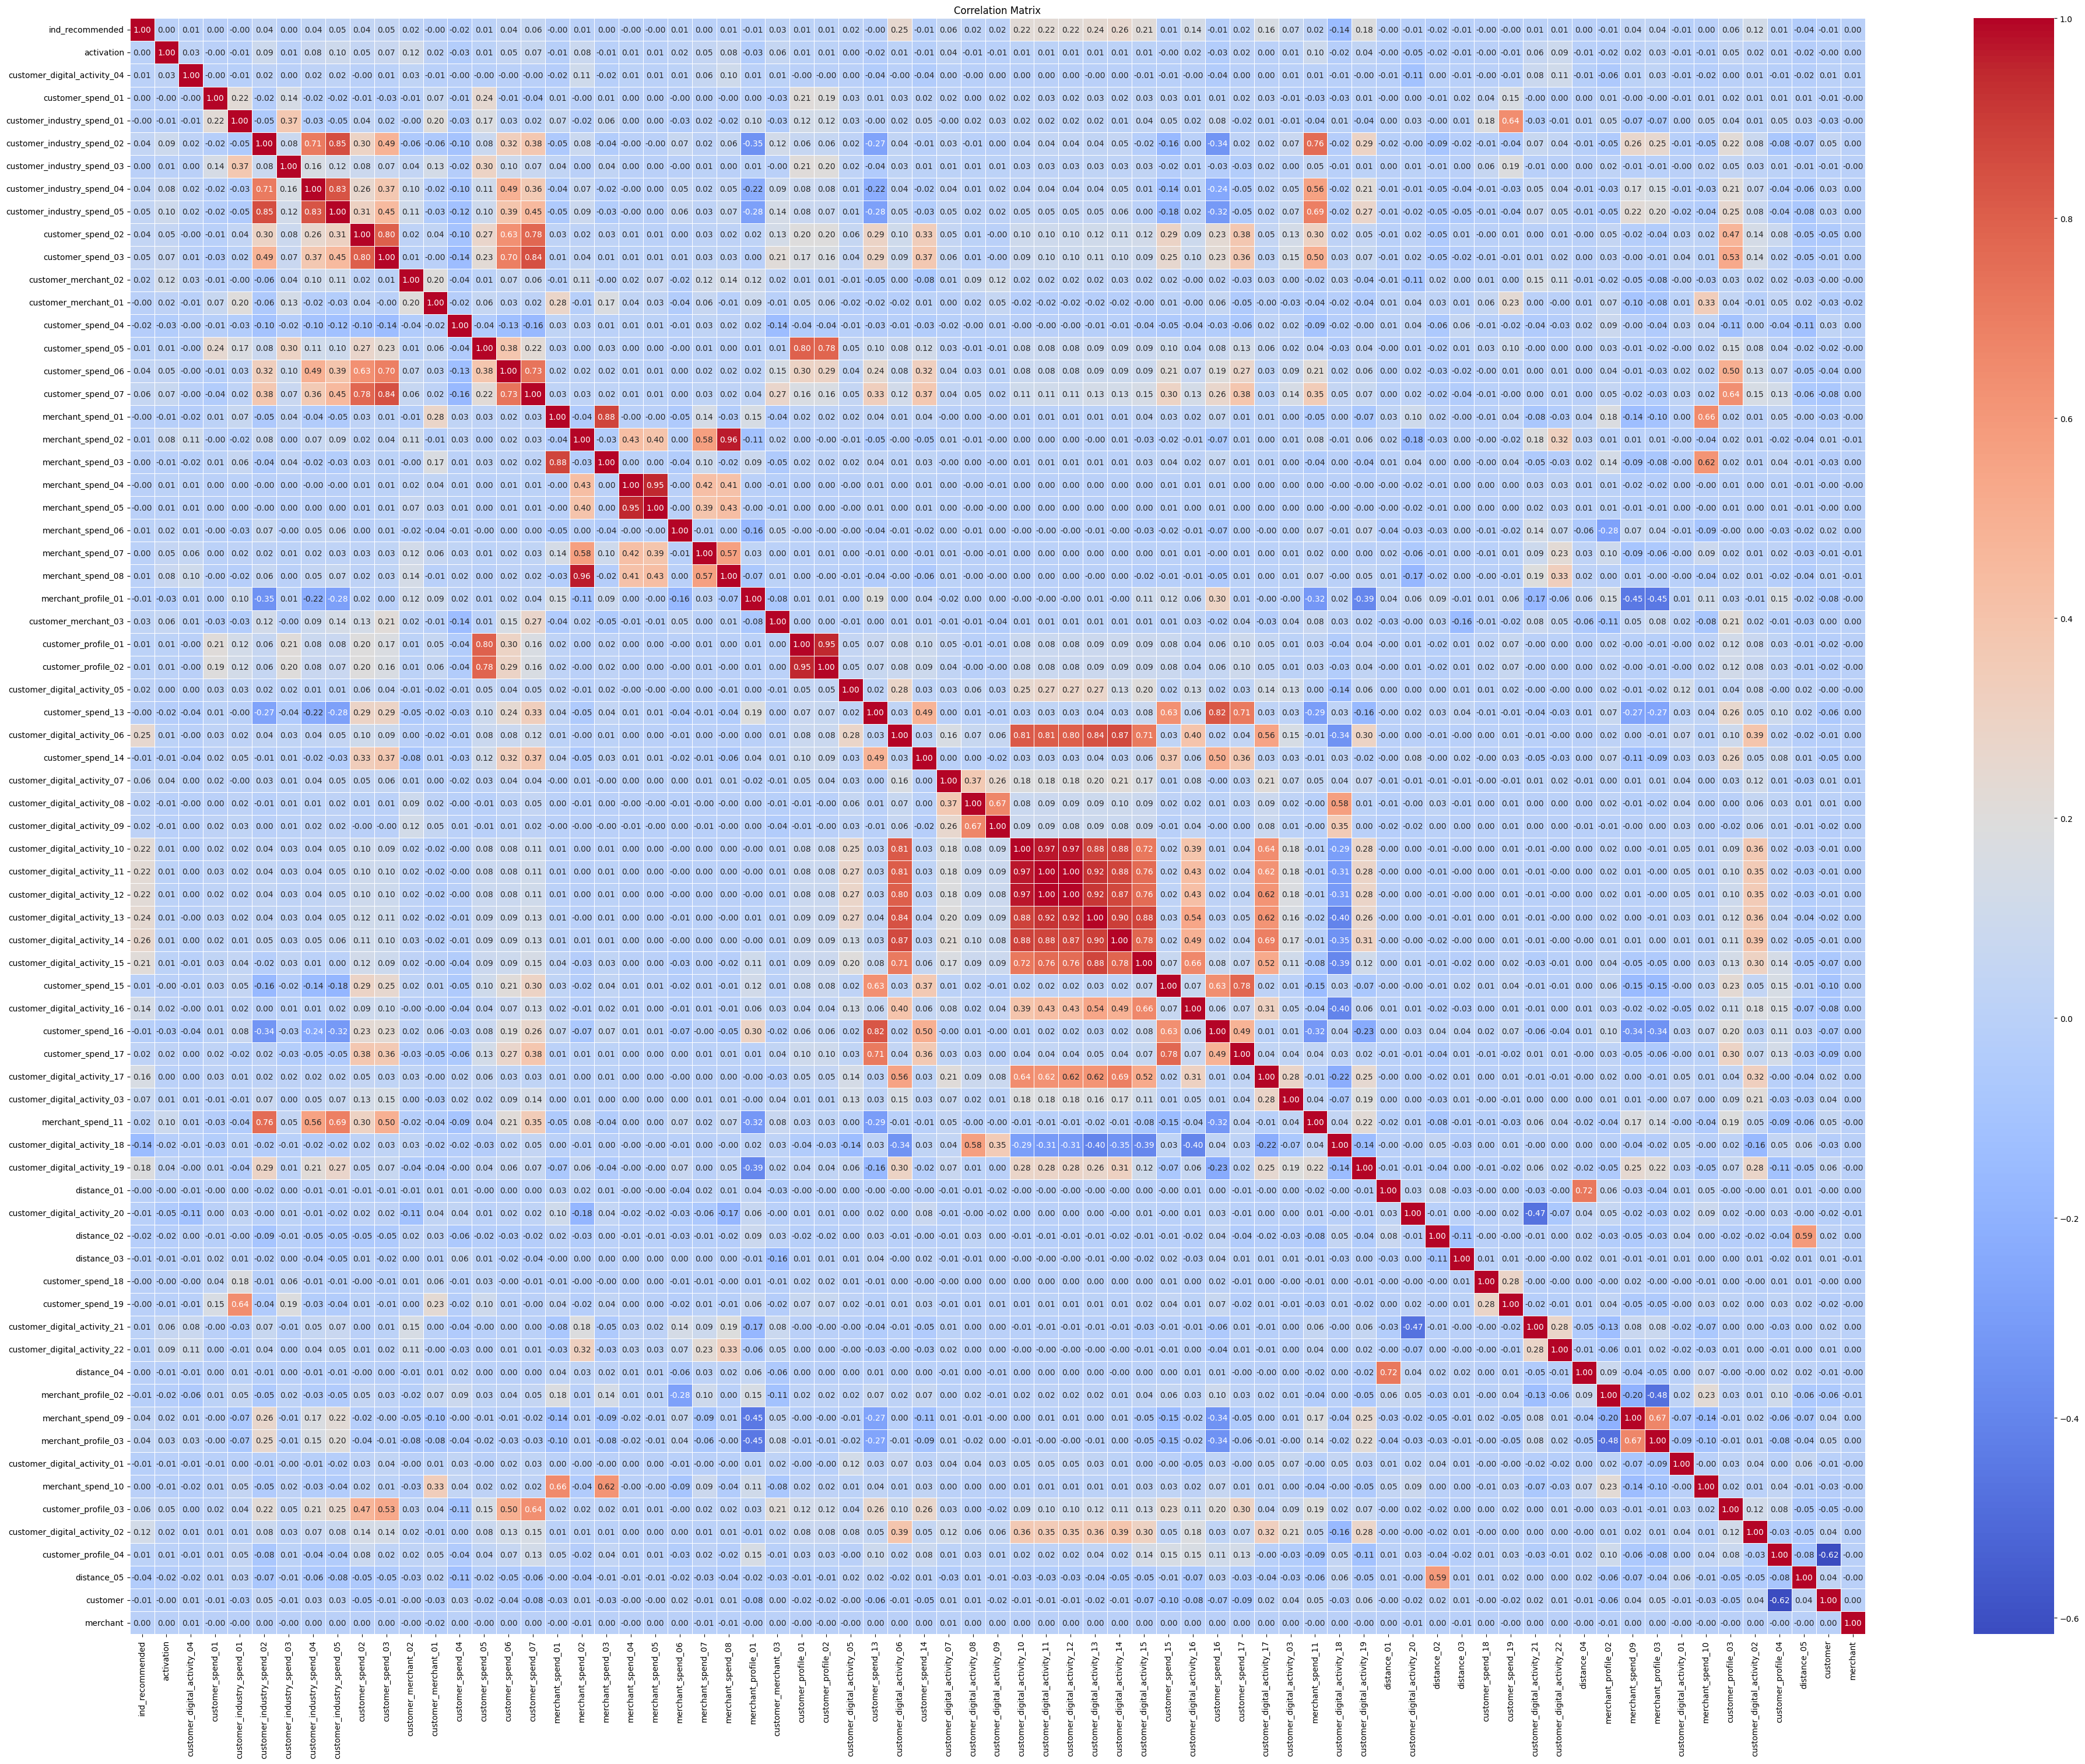

In [7]:
# Visualise the correlation matrix

plt.figure(figsize=(48, 36))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Determine which features have the last null/NaN values

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Sort the columns based on the number of null values in ascending order
sorted_columns = null_counts.sort_values()

# Print the columns with the least null values
print("Columns with the least null values:")
sorted_columns

Columns with the least null values:


ind_recommended                        0
distance_05                            0
customer                               0
merchant                               0
activation                             0
                                  ...   
customer_digital_activity_18    12154010
customer_digital_activity_08    12154010
customer_digital_activity_09    12154010
customer_merchant_01            12219172
customer_merchant_02            12219172
Length: 71, dtype: int64

In [9]:
# Filter the sorted columns to include only those with no null values
no_null_columns = sorted_columns[sorted_columns == 0]

# Print the columns with no null values
print("Columns with no null values:")
print(no_null_columns)

Columns with no null values:
ind_recommended    0
distance_05        0
customer           0
merchant           0
activation         0
dtype: int64


In [10]:
# Save features and their counts into a txt file

sorted_columns.to_csv("output.txt", sep="\t")

In [11]:
"""Remove features with high correlation """

CORRELATION_THRESHOLD = 0.8

# Identify highly correlated features
highly_correlated_features = np.where(correlation_matrix > CORRELATION_THRESHOLD)

features_to_remove = set()
for feature1, feature2 in zip(*highly_correlated_features):
    if feature1 != feature2:
        if feature1 not in features_to_remove and feature2 not in features_to_remove:
            features_to_remove.add(feature2)

# Remove the highly correlated features
selected_features = [
    feature for i, feature in enumerate(df.columns) if i not in features_to_remove
]
selected_df = df[selected_features]

print("Selected Features:")
selected_df.head()

Selected Features:


ind_recommended  activation  customer_digital_activity_04  \
0                0           0                           NaN   
1                0           0                           NaN   
2                0           0                           NaN   
3                0           0                           NaN   
4                1           0                           NaN   

   customer_spend_01  customer_industry_spend_01  customer_industry_spend_02  \
0         107.215862                   26.686594                        74.0   
1          35.552000                   50.928261                         3.0   
2          31.623103                   48.837872                        19.0   
3         112.277391                         NaN                         NaN   
4         448.427273                         NaN                         NaN   

   customer_industry_spend_03  customer_industry_spend_04  customer_spend_02  \
0                     3682.75                       138.0               14.0   
1                     1171.35                        23.0                2.0   
2                     2295.38                        47.0               11.0   
3                         NaN                         NaN               16.0   
4                         NaN                         NaN                5.0   

   customer_spend_03  ...  merchant_spend_09  merchant_profile_03  \
0              133.0  ...            49466.0              65923.0   
1                8.0  ...             3638.0               7801.0   
2               62.0  ...             3912.0              12868.0   
3               33.0  ...            28919.0              23553.0   
4                8.0  ...             1086.0                308.0   

   customer_digital_activity_01  merchant_spend_10  customer_profile_03  \
0                      0.000000             29.180            58.434969   
1                      0.419355             28.465             5.392089   
2                      0.836364            421.500            33.780445   
3                      0.952381             50.000            37.340085   
4                      0.754386             69.509            77.794164   

   customer_digital_activity_02  customer_profile_04  distance_05  customer  \
0                     32.500000                 86.0    15.856826    168972   
1                      7.000000                125.0     6.998555    212404   
2                      0.000000                180.0     1.753009    225178   
3                     28.666667                134.0     9.000063    183948   
4                     15.000000                114.0     1.767939    210107   

   merchant  
0    152285  
1     39032  
2      7439  
3    485069  
4    536004  

[5 rows x 59 columns]

In [12]:
"""
selected_df contains the truncated dataframe after highly-correlated features have been removed.
Now remove columns with over the specified threshold count of null values.
"""

# Count the null values in each column
null_counts = selected_df.isnull().sum()

NULL_COUNT_THRESHOLD = 3000000

# Filter the DataFrame to preserve only columns with less than `threshold` null values
filtered_columns = null_counts[null_counts < NULL_COUNT_THRESHOLD].index
filtered_df = df[filtered_columns]

print("Features in filtered DataFrame:")
features = filtered_df.columns.to_list()
print(features)
len(features)

Features in filtered DataFrame:
['ind_recommended', 'activation', 'customer_spend_01', 'customer_spend_02', 'customer_spend_03', 'customer_spend_05', 'customer_spend_06', 'merchant_spend_01', 'merchant_spend_02', 'merchant_spend_04', 'merchant_spend_06', 'merchant_spend_07', 'merchant_profile_01', 'customer_profile_01', 'distance_04', 'merchant_profile_02', 'merchant_spend_09', 'merchant_profile_03', 'customer_digital_activity_01', 'merchant_spend_10', 'customer_profile_03', 'customer_digital_activity_02', 'customer_profile_04', 'distance_05', 'customer', 'merchant']


26

In [13]:
# Add features that are missing from the Customer Industry Spend and Customer Merchant categories

filtered_df["customer_merchant_01"] = df["customer_merchant_01"].values
filtered_df["customer_merchant_02"] = df["customer_merchant_02"].values

filtered_df.shape[1]

/var/folders/hd/2s610yks5cngjgv9t700zzv80000gn/T/ipykernel_18311/2456643495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["customer_merchant_01"] = df["customer_merchant_01"].values
/var/folders/hd/2s610yks5cngjgv9t700zzv80000gn/T/ipykernel_18311/2456643495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["customer_merchant_02"] = df["customer_merchant_02"].values


28

In [14]:
filtered_df["customer_industry_spend_04"] = df["customer_industry_spend_04"].values
filtered_df["customer_industry_spend_05"] = df["customer_industry_spend_05"].values

filtered_df.shape[1]

/var/folders/hd/2s610yks5cngjgv9t700zzv80000gn/T/ipykernel_18311/385177032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["customer_industry_spend_04"] = df["customer_industry_spend_04"].values
/var/folders/hd/2s610yks5cngjgv9t700zzv80000gn/T/ipykernel_18311/385177032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["customer_industry_spend_05"] = df["customer_industry_spend_05"].values


30

In [15]:
# Impute null values with the mean of each column

df_imputed = filtered_df.fillna(df.mean())

In [16]:
# Verify that none of the remaining features have any NULL/NaN values left after interpolation

imputed_null_counts = df_imputed.isnull().sum()

# Filter the columns to include only those with null values
imputed_null_columns = imputed_null_counts[imputed_null_counts > 0]

imputed_null_columns

Series([], dtype: int64)

In [17]:
# Split the data into 5 folds for K-Fold Cross Validation

from sklearn.model_selection import KFold

X = df_imputed.drop(columns=["activation"])
y = df_imputed["activation"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
# Randomly sample 100_000 indices for each k-fold and save them to ensure consistency across models

MAX_SAMPLES = 100_000

K_FOLD_INDICES = []

for train_index, test_index in kf.split(X, y):
    # Randomly sample indices for both training and testing
    train_index = np.random.choice(
        train_index, size=min(len(train_index), MAX_SAMPLES), replace=False
    )
    test_index = np.random.choice(
        test_index, size=min(len(test_index), MAX_SAMPLES), replace=False
    )

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    K_FOLD_INDICES.append([X_train, X_test, y_train, y_test])

In [27]:
"""Random Forest Classifier
Based on the selected features and whether a merchant was recommended to a customer, use a Random Forest Classifier to predict
whether a customer will activate.
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

scores = []
for X_train, X_test, y_train, y_test in K_FOLD_INDICES:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Display cross-validation scores
print("Cross-validation scores:", scores)

# Compute mean cross-validation score
mean_score = sum(scores) / len(scores)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.9945, 0.99445, 0.99483, 0.99442, 0.99473]
Mean cross-validation score: 0.994586


In [28]:
# Save the random forest classifier model to joblib

from joblib import dump

dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [29]:
# Load the random forest classifier model

from joblib import load

rf_model = load('random_forest_model.joblib')

In [50]:
# Generate 100_000 random indices based on the original imputed_df for testing


def generate_test_samples():
    N_SAMPLES = 100_000

    X_sampled = X.sample(n=N_SAMPLES)
    y_sampled = y.loc[X_sampled.index]

    return X_sampled, y_sampled

In [51]:
# Generate the pred_score column


def generate_pred_score(X_sampled, y_sampled):
    # Predict probabilities for the positive class (class 1)
    y_proba = rf_model.predict_proba(X_sampled)[:, 1]

    # Add the predicted probabilities as a new column to the test dataset
    X_sampled["predicted_score"] = y_proba

    # Add the ground truth activation column back to X_sampled
    X_sampled["activation"] = y_sampled.values

    return X_sampled

In [53]:
# Test the scoring function provided

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from scoring_code import incr_act_top10

with open("scores.txt", "w+") as f:
    for i in range(50):
        X_sampled, y_sampled = generate_test_samples()

        X_sampled_test = generate_pred_score(X_sampled, y_sampled)

        score = incr_act_top10(input_df=X_sampled_test, pred_col="predicted_score")

        f.write(str(score) + "\n")

   ind_recommended  avg_30d_act
0                0     0.005632
1                1     0.005696
   ind_recommended  avg_30d_act
0                0     0.005377
1                1     0.006891
   ind_recommended  avg_30d_act
0                0     0.005666
1                1     0.004987
   ind_recommended  avg_30d_act
0                0     0.005527
1                1     0.006256
   ind_recommended  avg_30d_act
0                0     0.005710
1                1     0.006103
   ind_recommended  avg_30d_act
0                0     0.005306
1                1     0.006672
   ind_recommended  avg_30d_act
0                0     0.005267
1                1     0.005913
   ind_recommended  avg_30d_act
0                0     0.006021
1                1     0.006327
   ind_recommended  avg_30d_act
0                0     0.006022
1                1     0.005770
   ind_recommended  avg_30d_act
0                0     0.005832
1                1     0.006051
   ind_recommended  avg_30d_act
0       

In [20]:
# """Feedforward Neural Network
# Based on the selected features and whether a merchant was recommended to a customer, use a FNN to predict
# whether a customer will activate.
# """

# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# NUM_FEATURES = X.shape[1]
# NUM_CLASSES = 2

# # Define neural network architecture
# model = Sequential(
#     [
#         Dense(64, activation="relu", input_shape=(NUM_FEATURES,)),
#         Dense(32, activation="relu"),
#         Dense(
#             NUM_CLASSES, activation="softmax"
#         ),  # Output layer with softmax activation for classification
#     ]
# )

# # Compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# mean_scores = []
# for X_train, X_test, y_train, y_test in K_FOLD_INDICES:

#     # Preprocess data if necessary (e.g., scaling)
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Train the model
#     model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

#     # Evaluate the model
#     y_pred_proba = model.predict(X_test_scaled)
#     y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
#     score = accuracy_score(y_test, y_pred)
#     mean_scores.append(score)

# # Calculate mean cross-validation score
# mean_cv_score = np.mean(mean_scores)
# print("Mean cross-validation accuracy:", mean_cv_score)